<a href="https://colab.research.google.com/github/krissivolga29-commits/analytics_big_data/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%22%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Итоговая работа "Аналитика больших данных"

В качестве датасета используем данные условного онлайн-кинотеатра. У нас есть информация о пользователях, фильмах, а так же оценках, которые пользователи поставили тому или иному фильму.

В рамках работы хотим провести исследование текущей ситуации и решить бизнес-кейс с рекомендациями фильмов пользователям (очевидно, что не все пользователи смотрели все фильмы и нам нужно каким-то образом рекомендовать пользователю, что ему посмотреть следующим)

# Практика Python

В данном разделе мы выступим в роли data scientist и попытаемся построить простую модель для рекомендации фильмов пользователям.


In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

1. Загрузите в колаб файлы по оценкам (ratings) и фильмам (movies) и создайте на их основе pandas-датафреймы


In [ ]:
movies = pd.read_csv('u.item.csv', sep='|', encoding='ISO-8859-1', names = ['movie id', 'movie title', 'release date', 'video release date',
                                                                            'IMDb URL', 'unknown', 'Action', 'Adventure',
                                                                            'Animation', "Children's", 'Comedy', 'Crime',
                                                                            'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
                                                                            'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                                                                            'Thriller', 'War', 'Western'])

In [ ]:
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# преобразуем столбец release date, нам интересен год выпуска фильма
movies['release date'] = pd.to_datetime(movies['release date']).dt.floor('d').dt.year.convert_dtypes()
movies

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   Int64  
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [ ]:
ratings = pd.read_csv('u.data.csv',sep='\t',names=['user id', 'item id', 'rating','timestamp'])

In [ ]:
ratings.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


2. Сформировав общий топ фильмов в прошлой практике, мы хотим сделать шаг вперед и начать советовать пользователю те фильмы, которые могли бы быть для него наиболее интересны. Наша цель - научится предсказывать оценку фильма пользователем. Для тестирования модели найдем пользователя, который поставил больше всего оценок.

Средствами Pandas, используя dataframe ratings, найдите id пользователя, поставившего больше всего оценок.


In [ ]:
ratings.value_counts(['user id']).reset_index(name='count')

,user id,count
0,405,737
1,655,685
2,13,636
3,450,540
4,276,518
...,...,...
938,685,20
939,475,20
940,36,20
941,732,20


3. Отберем фильмы, которые оценил данный пользователь.


In [ ]:
id_max=ratings[ratings['user id']==405]
id_max

,user id,item id,rating,timestamp
12276,405,56,4,885544911
12383,405,592,1,885548670
12430,405,1582,1,885548670
12449,405,171,1,885549544
12460,405,580,1,885547447
...,...,...,...,...
98956,405,375,1,885546835
98978,405,445,4,885548435
99148,405,1246,1,885547735
99465,405,196,1,885546112


In [ ]:
id_max.count()

,0
user id,737
item id,737
rating,737
timestamp,737


Для построения модели нам нужны признаки. В качестве таковых будем использовать:

Год выхода

Жанры

Общее количество оценок

Суммарную оценку

4. Добавьте к датафрейму из задания 3 столбцы:

По жанрам. Каждый столбец - это жанр. Единицу записываем, если фильм принадлежит данному жанру и 0 - если нет,

столбцы с общим количеством оценок от всех пользователей на фильм и суммарной оценкой от всех пользователей.

In [ ]:
ratings_sum = ratings.groupby('item id', as_index=False).sum()
ratings_sum

,item id,user id,rating,timestamp
0,1,215609,1753,399028021059
1,2,64453,420,115727673079
2,3,41322,273,79400420109
3,4,98125,742,184487964275
4,5,37786,284,75902581757
...,...,...,...,...
1677,1678,863,1,889289570
1678,1679,863,3,889289491
1679,1680,863,2,889289570
1680,1681,896,3,887160722


In [ ]:
ratings_sum = ratings_sum.rename(columns={'rating' : 'rating_sum'})
ratings_sum

,item id,user id,rating_sum,timestamp
0,1,215609,1753,399028021059
1,2,64453,420,115727673079
2,3,41322,273,79400420109
3,4,98125,742,184487964275
4,5,37786,284,75902581757
...,...,...,...,...
1677,1678,863,1,889289570
1678,1679,863,3,889289491
1679,1680,863,2,889289570
1680,1681,896,3,887160722


In [ ]:
ratings_count = ratings.groupby('item id', as_index=False).count()
ratings_count

,item id,user id,rating,timestamp
0,1,452,452,452
1,2,131,131,131
2,3,90,90,90
3,4,209,209,209
4,5,86,86,86
...,...,...,...,...
1677,1678,1,1,1
1678,1679,1,1,1
1679,1680,1,1,1
1680,1681,1,1,1


In [ ]:
ratings_count = ratings_count.rename(columns={'rating' : 'rating_count', 'item id': 'item id_'})
ratings_count

,item id_,user id,rating_count,timestamp
0,1,452,452,452
1,2,131,131,131
2,3,90,90,90
3,4,209,209,209
4,5,86,86,86
...,...,...,...,...
1677,1678,1,1,1
1678,1679,1,1,1
1679,1680,1,1,1
1680,1681,1,1,1


In [ ]:
sum_count = pd.concat([ratings_sum,ratings_count], axis=1)
sum_count

,item id,user id,rating_sum,timestamp,item id_,user id,rating_count,timestamp
0,1,215609,1753,399028021059,1,452,452,452
1,2,64453,420,115727673079,2,131,131,131
2,3,41322,273,79400420109,3,90,90,90
3,4,98125,742,184487964275,4,209,209,209
4,5,37786,284,75902581757,5,86,86,86
...,...,...,...,...,...,...,...,...
1677,1678,863,1,889289570,1678,1,1,1
1678,1679,863,3,889289491,1679,1,1,1
1679,1680,863,2,889289570,1680,1,1,1
1680,1681,896,3,887160722,1681,1,1,1


In [ ]:
sum_count = sum_count[['item id', 'rating_count', 'rating_sum']]
sum_count

,item id,rating_count,rating_sum
0,1,452,1753
1,2,131,420
2,3,90,273
3,4,209,742
4,5,86,284
...,...,...,...
1677,1678,1,1
1678,1679,1,3
1679,1680,1,2
1680,1681,1,3


In [ ]:
# объединим подтаблицу с суммой и количеством оценок

id_max = id_max.merge(sum_count, how='left', on='item id')
id_max.head()

,user id,item id,rating,timestamp,rating_count,rating_sum
0,405,56,4,885544911,394,1600
1,405,592,1,885548670,9,30
2,405,1582,1,885548670,1,1
3,405,171,1,885549544,65,252
4,405,580,1,885547447,32,108


¯ \ _ (ツ) _ / ¯

Как можно объединять две таблицы, не имея одинакового признака???

item id = movie id это одно и тоже? можно по ним объединять? только нужно переименовать

In [ ]:
id_max = id_max.rename(columns={'item id' : 'movie id'})
id_max

,user id,movie id,rating,timestamp,rating_count,rating_sum
0,405,56,4,885544911,394,1600
1,405,592,1,885548670,9,30
2,405,1582,1,885548670,1,1
3,405,171,1,885549544,65,252
4,405,580,1,885547447,32,108
...,...,...,...,...,...,...
732,405,375,1,885546835,23,45
733,405,445,4,885548435,22,77
734,405,1246,1,885547735,7,11
735,405,196,1,885546112,251,983


In [ ]:
# объединям подтаблицу с таблицой movies
joined = id_max.merge(movies, how='left', on='movie id')
joined.head()

,user id,movie id,rating,timestamp,rating_count,rating_sum,movie title,release date,video release date,IMDb URL,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,405,56,4,885544911,394,1600,Pulp Fiction (1994),1994,NaN,http://us.imdb.com/M/title-exact?Pulp%20Fictio...,...,0,0,0,0,0,0,0,0,0,0
1,405,592,1,885548670,9,30,True Crime (1995),1995,NaN,http://us.imdb.com/M/title-exact?True%20Crime%...,...,0,0,0,0,1,0,0,1,0,0
2,405,1582,1,885548670,1,1,T-Men (1947),1947,NaN,http://us.imdb.com/M/title-exact?T-Men%20(1947),...,0,1,0,0,0,0,0,0,0,0
3,405,171,1,885549544,65,252,Delicatessen (1991),1991,NaN,http://us.imdb.com/M/title-exact?Delicatessen%...,...,0,0,0,0,0,0,1,0,0,0
4,405,580,1,885547447,32,108,"Englishman Who Went Up a Hill, But Came Down a...",1995,NaN,http://us.imdb.com/M/title-exact?Englishman%20...,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# сводная таблица
ratings.pivot_table(index = 'user id', columns = 'rating', values = 'timestamp', aggfunc = 'count', fill_value = 0,
                    margins = True).tail()

rating,1,2,3,4,5,All
user id,,,,,,
940,5,12,33,43,14,107
941,0,2,2,11,7,22
942,0,1,12,31,35,79
943,17,27,28,62,34,168
All,6110,11370,27145,34174,21201,100000


In [ ]:
# сводная таблица пользователь 405
id_max.pivot_table(index = 'user id', columns = 'rating', values = 'timestamp', aggfunc = 'count', fill_value = 0,
                    margins = True)

rating,1,2,3,4,5,All
user id,,,,,,
405,485,73,63,48,68,737
All,485,73,63,48,68,737


Теперь все готово и можно строить модель!

5.	Сформируйте X_train, X_test, y_train, y_test


У - это оценка
Х - это признаки, в нашем случае это сумма оценок по каждому фильму, количество оценок по каждому фильму, год выпуска, информация о жанрах.

In [ ]:
X = joined[['rating_sum', 'rating_count', 'release date', 'unknown', 'Action', 'Adventure',
                                                                            'Animation', "Children's", 'Comedy', 'Crime',
                                                                            'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
                                                                            'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                                                                            'Thriller', 'War', 'Western'  ]]
X

,rating_sum,rating_count,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1600,394,1994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,30,9,1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,1,1947,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,252,65,1991,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,108,32,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,45,23,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
733,77,22,1945,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
734,11,7,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
735,983,251,1989,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = joined[['rating']]
y

,rating
0,4
1,1
2,1
3,1
4,1
...,...
732,1
733,4
734,1
735,1


In [ ]:
# Разделим выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Возьмите модель линейной регрессии (или любую другую для задачи регрессии)  и обучите ее на фильмах


In [ ]:
# Модель линейной регрессии
from sklearn.linear_model import LinearRegression # линейная регрессия

model = LinearRegression()
model.fit(X_train, y_train) # метод фит - метод обучения модели

LinearRegression()

In [ ]:
y_predict = model.predict(X) # обучаем регрессию

In [ ]:
y_predict[:5]

array([[4.85139041],
       [1.45145501],
       [0.78914421],
       [1.81509496],
       [1.35758305]])

In [ ]:
model.coef_

array([[-1.86655584e-03,  1.71610024e-02, -6.98474699e-03,
         3.19189120e-16, -1.31193702e-01, -3.11220742e-01,
        -3.23948927e-01,  3.85460466e-01,  2.24441059e-01,
        -7.03822027e-03,  4.84395525e-01,  1.64951037e-01,
        -2.31983788e-01, -4.72965338e-01,  7.10599481e-02,
         4.91284982e-01,  2.79043023e-01, -1.25969297e-01,
         6.07458537e-03,  1.62412395e-01, -3.11453272e-01,
        -3.11707789e-01]])

In [ ]:
model.intercept_

array([14.8461175])

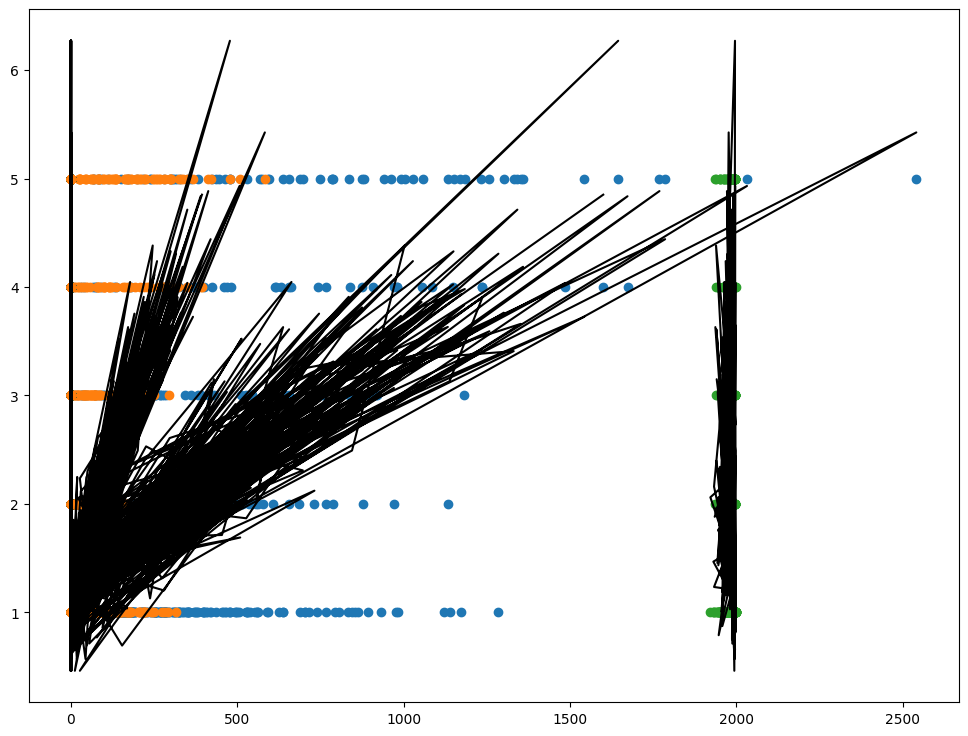

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(X, y, 'o')
plt.plot(X, y_predict, 'k-')
plt.show()

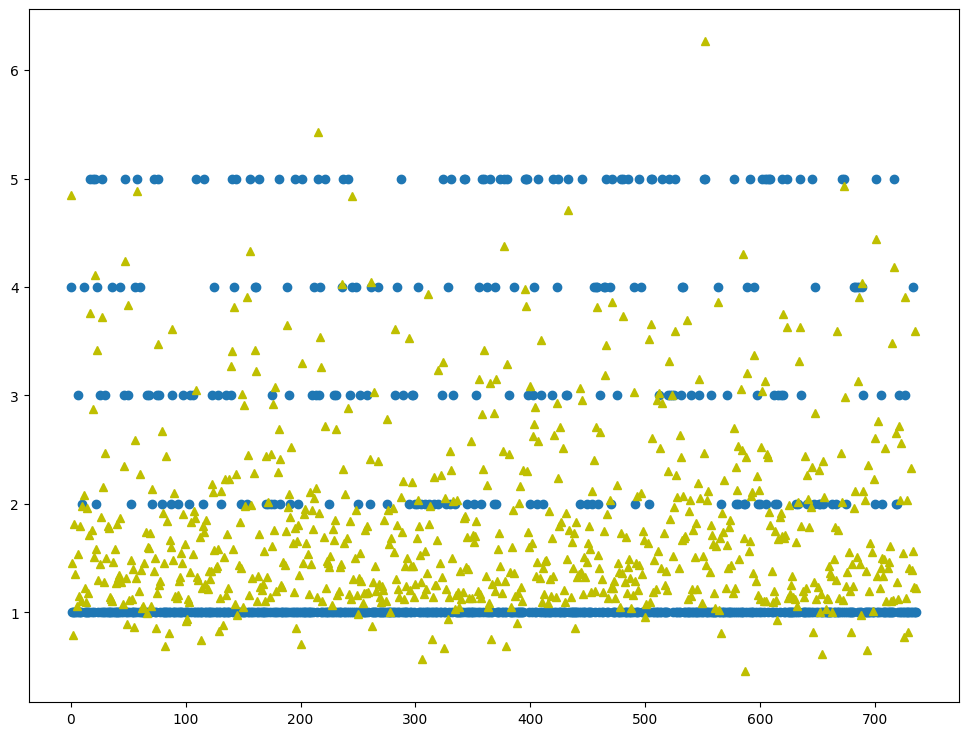

In [ ]:
# Попробуем нарисовать как расходится факт с предсказаниями.
plt.figure(figsize=(12,9))
plt.plot(y.index, y, 'o')
plt.plot(y.index, y_predict, 'y^')
plt.show() # видим как цена действительно накладывается на истину

7.	Оцените качество модели на X_test, y_test при помощи метрик для задачи регрессии


In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Вычисление метрики RMSE на обучающем и тестовом множестве.
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred_test, squared = False )
rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.3035744537530158

In [ ]:
rmse = mean_squared_error( y_train, y_pred_train,squared = False )
rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.0327387938815606

In [ ]:
# Вычисление метрики R2 на обучающем и тестовом множестве.
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test )
r2

0.15564715576792465

In [ ]:
r2= r2_score(y_train , y_pred_train )
r2

0.3917696962160373

In [ ]:
mean_squared_error(y_train, model.predict(X_train))

1.0665494163879408

In [ ]:
mean_squared_error(y_test, model.predict(X_test))

1.6993063564774735

Большее значение среднеквадратического отклонения показывает больший разброс значений в представленном множестве со средней величиной множества. Низкая точность предсказания - 39%. Модель не рабочая

In [ ]:
# Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

model.score(X_train, y_train)

0.3917696962160373

In [ ]:
model.score(X_test,y_test)

0.15564715576792465

#Spark

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,531 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https:// archive.apache.org/dist/spark/spark-3.5.2/spark-3.5.2-bin-hadoop3.tgz

In [ ]:
!tar -xvf spark-3.5.2-bin-hadoop3.tgz

spark-3.5.2-bin-hadoop3/
spark-3.5.2-bin-hadoop3/bin/
spark-3.5.2-bin-hadoop3/bin/sparkR2.cmd
spark-3.5.2-bin-hadoop3/bin/sparkR
spark-3.5.2-bin-hadoop3/bin/load-spark-env.sh
spark-3.5.2-bin-hadoop3/bin/find-spark-home.cmd
spark-3.5.2-bin-hadoop3/bin/pyspark2.cmd
spark-3.5.2-bin-hadoop3/bin/spark-sql.cmd
spark-3.5.2-bin-hadoop3/bin/spark-sql2.cmd
spark-3.5.2-bin-hadoop3/bin/spark-submit2.cmd
spark-3.5.2-bin-hadoop3/bin/spark-class.cmd
spark-3.5.2-bin-hadoop3/bin/spark-submit
spark-3.5.2-bin-hadoop3/bin/spark-shell
spark-3.5.2-bin-hadoop3/bin/spark-sql
spark-3.5.2-bin-hadoop3/bin/load-spark-env.cmd
spark-3.5.2-bin-hadoop3/bin/spark-class
spark-3.5.2-bin-hadoop3/bin/spark-shell2.cmd
spark-3.5.2-bin-hadoop3/bin/spark-submit.cmd
spark-3.5.2-bin-hadoop3/bin/pyspark.cmd
spark-3.5.2-bin-hadoop3/bin/pyspark
spark-3.5.2-bin-hadoop3/bin/sparkR.cmd
spark-3.5.2-bin-hadoop3/bin/docker-image-tool.sh
spark-3.5.2-bin-hadoop3/bin/run-example
spark-3.5.2-bin-hadoop3/bin/spark-class2.cmd
spark-3.5.2-bin-

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.2-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

8. Загрузить данные в spark


In [ ]:
dfs1 = spark.read.csv('u.data.csv', inferSchema=True, header=False, sep='\t')

In [ ]:
dfs1.show(5)

+---+---+---+---------+
|_c0|_c1|_c2|      _c3|
+---+---+---+---------+
|196|242|  3|881250949|
|186|302|  3|891717742|
| 22|377|  1|878887116|
|244| 51|  2|880606923|
|166|346|  1|886397596|
+---+---+---+---------+
only showing top 5 rows



In [ ]:
dfs1.count()

100000

In [ ]:
dfs1.dtypes

[('_c0', 'int'), ('_c1', 'int'), ('_c2', 'int'), ('_c3', 'int')]

In [ ]:
dfs1 = dfs1.toDF ('user id', 'item id', 'rating', 'timestamp')

In [ ]:
dfs1.show()

+-------+-------+------+---------+
|user id|item id|rating|timestamp|
+-------+-------+------+---------+
|    196|    242|     3|881250949|
|    186|    302|     3|891717742|
|     22|    377|     1|878887116|
|    244|     51|     2|880606923|
|    166|    346|     1|886397596|
|    298|    474|     4|884182806|
|    115|    265|     2|881171488|
|    253|    465|     5|891628467|
|    305|    451|     3|886324817|
|      6|     86|     3|883603013|
|     62|    257|     2|879372434|
|    286|   1014|     5|879781125|
|    200|    222|     5|876042340|
|    210|     40|     3|891035994|
|    224|     29|     3|888104457|
|    303|    785|     3|879485318|
|    122|    387|     5|879270459|
|    194|    274|     2|879539794|
|    291|   1042|     4|874834944|
|    234|   1184|     2|892079237|
+-------+-------+------+---------+
only showing top 20 rows



In [ ]:
dfs2 = spark.read.csv('u.item.csv', inferSchema=True, header=False, sep='|')

In [ ]:
dfs2.show(5)

+---+-----------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|              _c1|        _c2| _c3|                 _c4|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+---+-----------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  1| Toy Story (1995)|01-Jan-1995|NULL|http://us.imdb.co...|  0|  0|  0|  1|  1|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|  2| GoldenEye (1995)|01-Jan-1995|NULL|http://us.imdb.co...|  0|  1|  1|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  3|Four Rooms (1995)|01-Jan-1995|NULL|http://us.imdb.co...|  0|  0|  0|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  4|Get Shorty (1995)|01-Jan-1995|NULL|http://us.imdb.co...|  0|  1|  0|  0|  0|   1|  

In [ ]:
dfs2 = dfs2.toDF ('item id', 'movie title','release date','video release date', 'IMDb URL','unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama',
                  'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western')

In [ ]:
dfs2.show(5)

+-------+-----------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|item id|      movie title|release date|video release date|            IMDb URL|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+-------+-----------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|      1| Toy Story (1995)| 01-Jan-1995|              NULL|http://us.imdb.co...|      0|     0|        0|        1|         1|     1|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|
|      2| GoldenEye (1995)| 01-Jan-1995|              NULL|h

In [ ]:
dfs2.describe().show()

+-------+------------------+--------------------+------------+------------------+--------------------+--------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+
|summary|           item id|         movie title|release date|video release date|            IMDb URL|             unknown|             Action|         Adventure|          Animation|         Children's|             Comedy|              Crime|         Documentary|              Drama|             Fantasy|           Film-Noir|              Horror|            Musical|            Mystery|            Romance|             Sci-Fi|          Thriller|                War|            Western|
+-------+------------------+

In [ ]:
grouped = dfs1.groupBy(['item id', 'rating'])

9. Средняя оценка для каждого фильма

In [ ]:
grouped.mean('rating').show()

+-------+------+-----------+
|item id|rating|avg(rating)|
+-------+------+-----------+
|    979|     2|        2.0|
|    248|     4|        4.0|
|   1267|     3|        3.0|
|   1079|     3|        3.0|
|     71|     4|        4.0|
|    626|     4|        4.0|
|   1070|     5|        5.0|
|    203|     4|        4.0|
|   1350|     2|        2.0|
|    515|     5|        5.0|
|    678|     2|        2.0|
|    162|     3|        3.0|
|    639|     5|        5.0|
|   1384|     1|        1.0|
|   1000|     4|        4.0|
|   1010|     4|        4.0|
|    307|     2|        2.0|
|    688|     3|        3.0|
|    444|     3|        3.0|
|    984|     5|        5.0|
+-------+------+-----------+
only showing top 20 rows



In [ ]:
df_avg=dfs1.groupBy('item id'). avg ('rating')
df_avg.show()

+-------+------------------+
|item id|       avg(rating)|
+-------+------------------+
|    496| 4.121212121212121|
|    471|3.6108597285067874|
|    463| 3.859154929577465|
|    148|          3.203125|
|   1342|               2.5|
|    833| 3.204081632653061|
|   1088| 2.230769230769231|
|   1591|3.1666666666666665|
|   1238|             3.125|
|   1580|               1.0|
|   1645|               4.0|
|    392|3.5441176470588234|
|    623| 2.923076923076923|
|    540| 2.511627906976744|
|    858|               1.0|
|    737| 2.983050847457627|
|    243|2.4393939393939394|
|   1025|2.9318181818181817|
|   1084| 3.857142857142857|
|   1127| 2.909090909090909|
+-------+------------------+
only showing top 20 rows



10. Посчитайте средствами спарка среднюю оценку для каждого жанра


In [ ]:
join_spark = dfs1.join(dfs2, "item id", "left")
join_spark.show()

+-------+-------+------+---------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|item id|user id|rating|timestamp|         movie title|release date|video release date|            IMDb URL|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+-------+-------+------+---------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|    242|    196|     3|881250949|        Kolya (1996)| 24-Jan-1997|              NULL|http://us.imdb.co...|      0|     0|        0|        0|         0|     1|    0|          0|    0|      0|        0|     0| 

In [ ]:
join_avg = df_avg.join(dfs2, "item id", "left")
join_avg.show()

+-------+------------------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|item id|       avg(rating)|         movie title|release date|video release date|            IMDb URL|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+-------+------------------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|    496| 4.121212121212121|It's a Wonderful ...| 01-Jan-1946|              NULL|http://us.imdb.co...|      0|     0|        0|        0|         0|     0|    0|          0|    1|      0|        0|     0|      0|      0|      0| 

11. В спарке получить 2 датафрейма с 5-ю самыми популярными и самыми непопулярными фильмами (по количеству оценок, либо по самой оценке - на Ваш выбор)


In [ ]:
join_avg.orderBy('avg(rating)').show(6)

+-------+-----------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|item id|avg(rating)|         movie title|release date|video release date|            IMDb URL|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+-------+-----------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|    830|        1.0|     Power 98 (1995)| 17-May-1996|              NULL|http://us.imdb.co...|      0|     1|        0|        0|         0|     0|    0|          0|    0|      0|        0|     0|      0|      1|      0|     0|       1|  0|      0|


In [ ]:
join_avg.sort('avg(rating)', ascending=False).show(5)

+-------+-----------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|item id|avg(rating)|         movie title|release date|video release date|            IMDb URL|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+-------+-----------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|   1599|        5.0|Someone Else's Am...| 10-May-1996|              NULL|http://us.imdb.co...|      0|     0|        0|        0|         0|     0|    0|          0|    1|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|


In [ ]:
join_avg.sort('avg(rating)', ascending=True).show(5)

+-------+-----------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|item id|avg(rating)|         movie title|release date|video release date|            IMDb URL|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+-------+-----------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|   1339|        1.0|Stefano Quantesto...| 01-Jan-1993|              NULL|http://us.imdb.co...|      0|     0|        0|        0|         0|     1|    0|          0|    1|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|
